In [94]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [95]:
# data = tf.keras.datasets.cifar10.load_data()

In [96]:
# x_train,x_test,y_train,y_test = train_test_split(data,data,test_size=0.5)

In [97]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [98]:
print(f"x_train={len(x_train)}\ny_train={len(y_train)}")

x_train=50000
y_train=50000


In [99]:
x_test[789]

array([[[100, 111, 134],
        [ 98, 110, 132],
        [ 98, 109, 131],
        ...,
        [ 69,  89, 114],
        [ 67,  87, 113],
        [ 66,  86, 111]],

       [[ 98, 109, 131],
        [ 95, 106, 128],
        [ 94, 105, 127],
        ...,
        [ 65,  85, 110],
        [ 64,  84, 109],
        [ 63,  83, 107]],

       [[ 94, 105, 127],
        [ 92, 103, 125],
        [ 92, 103, 125],
        ...,
        [ 63,  83, 108],
        [ 62,  82, 107],
        [ 60,  80, 105]],

       ...,

       [[ 13,  27,  40],
        [ 12,  26,  39],
        [ 12,  26,  39],
        ...,
        [  4,   6,  21],
        [  5,   7,  22],
        [  4,   7,  22]],

       [[ 12,  24,  38],
        [ 14,  26,  39],
        [  9,  21,  34],
        ...,
        [  3,   5,  19],
        [  3,   5,  20],
        [  5,   7,  22]],

       [[ 14,  23,  34],
        [ 12,  21,  31],
        [  9,  19,  29],
        ...,
        [  4,   4,  17],
        [  4,   5,  18],
        [  5,   5,  18]]

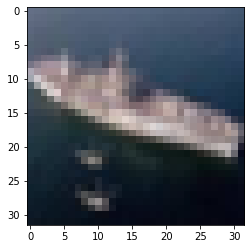

(32, 32, 3)


In [100]:
plt.imshow(x_test[789])
plt.show()
print(x_test[789].shape)

In [101]:
x_val = x_train[40000:]
y_val = y_train[40000:]

x_train = x_train[:40000]
y_train = y_train[:40000]

In [102]:
print(f"x_train={len(x_train)}")
print(f"x_test={len(x_test)}")
print(f"x_val={len(x_val)}")

x_train=40000
x_test=10000
x_val=10000


In [103]:
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

In [104]:
model = tf.keras.Sequential()

In [105]:
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))

In [106]:
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))

In [107]:
model.add(tf.keras.layers.Flatten())

In [108]:
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [109]:
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [110]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [111]:
results = model.fit(x_train, y_train,
batch_size=128,
epochs=50,
validation_data=(x_val,y_val))

Epoch 1/50
313/313 [==============================] - 25s 80ms/step - loss: 2.0056 - accuracy: 0.2331 - val_loss: 1.6496 - val_accuracy: 0.3944
Epoch 2/50
313/313 [==============================] - 26s 83ms/step - loss: 1.6989 - accuracy: 0.3551 - val_loss: 1.4257 - val_accuracy: 0.4819
Epoch 3/50
313/313 [==============================] - 24s 78ms/step - loss: 1.5509 - accuracy: 0.4205 - val_loss: 1.3875 - val_accuracy: 0.4940
Epoch 4/50
313/313 [==============================] - 23s 75ms/step - loss: 1.4662 - accuracy: 0.4598 - val_loss: 1.2272 - val_accuracy: 0.5718
Epoch 5/50
313/313 [==============================] - 25s 79ms/step - loss: 1.3917 - accuracy: 0.4913 - val_loss: 1.1419 - val_accuracy: 0.6152
Epoch 6/50
313/313 [==============================] - 25s 79ms/step - loss: 1.2953 - accuracy: 0.5309 - val_loss: 1.0947 - val_accuracy: 0.6213
Epoch 7/50
313/313 [==============================] - 24s 77ms/step - loss: 1.2365 - accuracy: 0.5588 - val_loss: 1.0856 - val_accuracy:

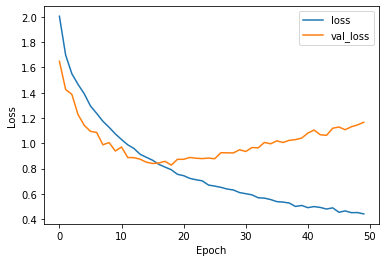

In [112]:
plt.plot(results.history["loss"],label="loss")
plt.plot(results.history["val_loss"],label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

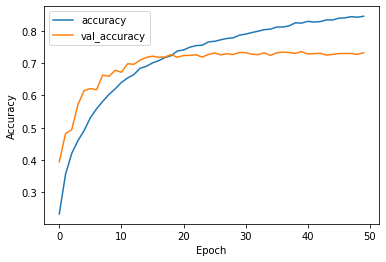

In [117]:
plt.plot(results.history["accuracy"],label="accuracy")
plt.plot(results.history["val_accuracy"],label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [118]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.1672 - accuracy: 0.7278


[1.167187213897705, 0.7278000116348267]

In [119]:
prediction_result = model.predict(x_test[789].reshape(1,32,32,3))
prediction_result

1/1 [==============================] - 1s 880ms/step


array([[1.58204230e-07, 1.84560578e-16, 1.03430081e-15, 4.33625101e-23,
        3.12637556e-28, 1.79529219e-28, 2.60579584e-20, 5.08161792e-29,
        9.99999881e-01, 1.05192353e-16]], dtype=float32)

In [120]:
predicted_class=prediction_result.argmax()
predicted_probability = prediction_result.max()

In [121]:
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")

This image belongs to class 8 with 0.9999998807907104 probability %
